<a href="https://colab.research.google.com/github/AAmeera/Degree-Projects/blob/main/Fish_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print (tf.__version__)

2.15.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
Fish_data = pd.read_csv('Fish.csv')

In [ ]:
Fish_data.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [ ]:
print(Fish_data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [ ]:
Fish_data = Fish_data.dropna()

In [ ]:
Fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


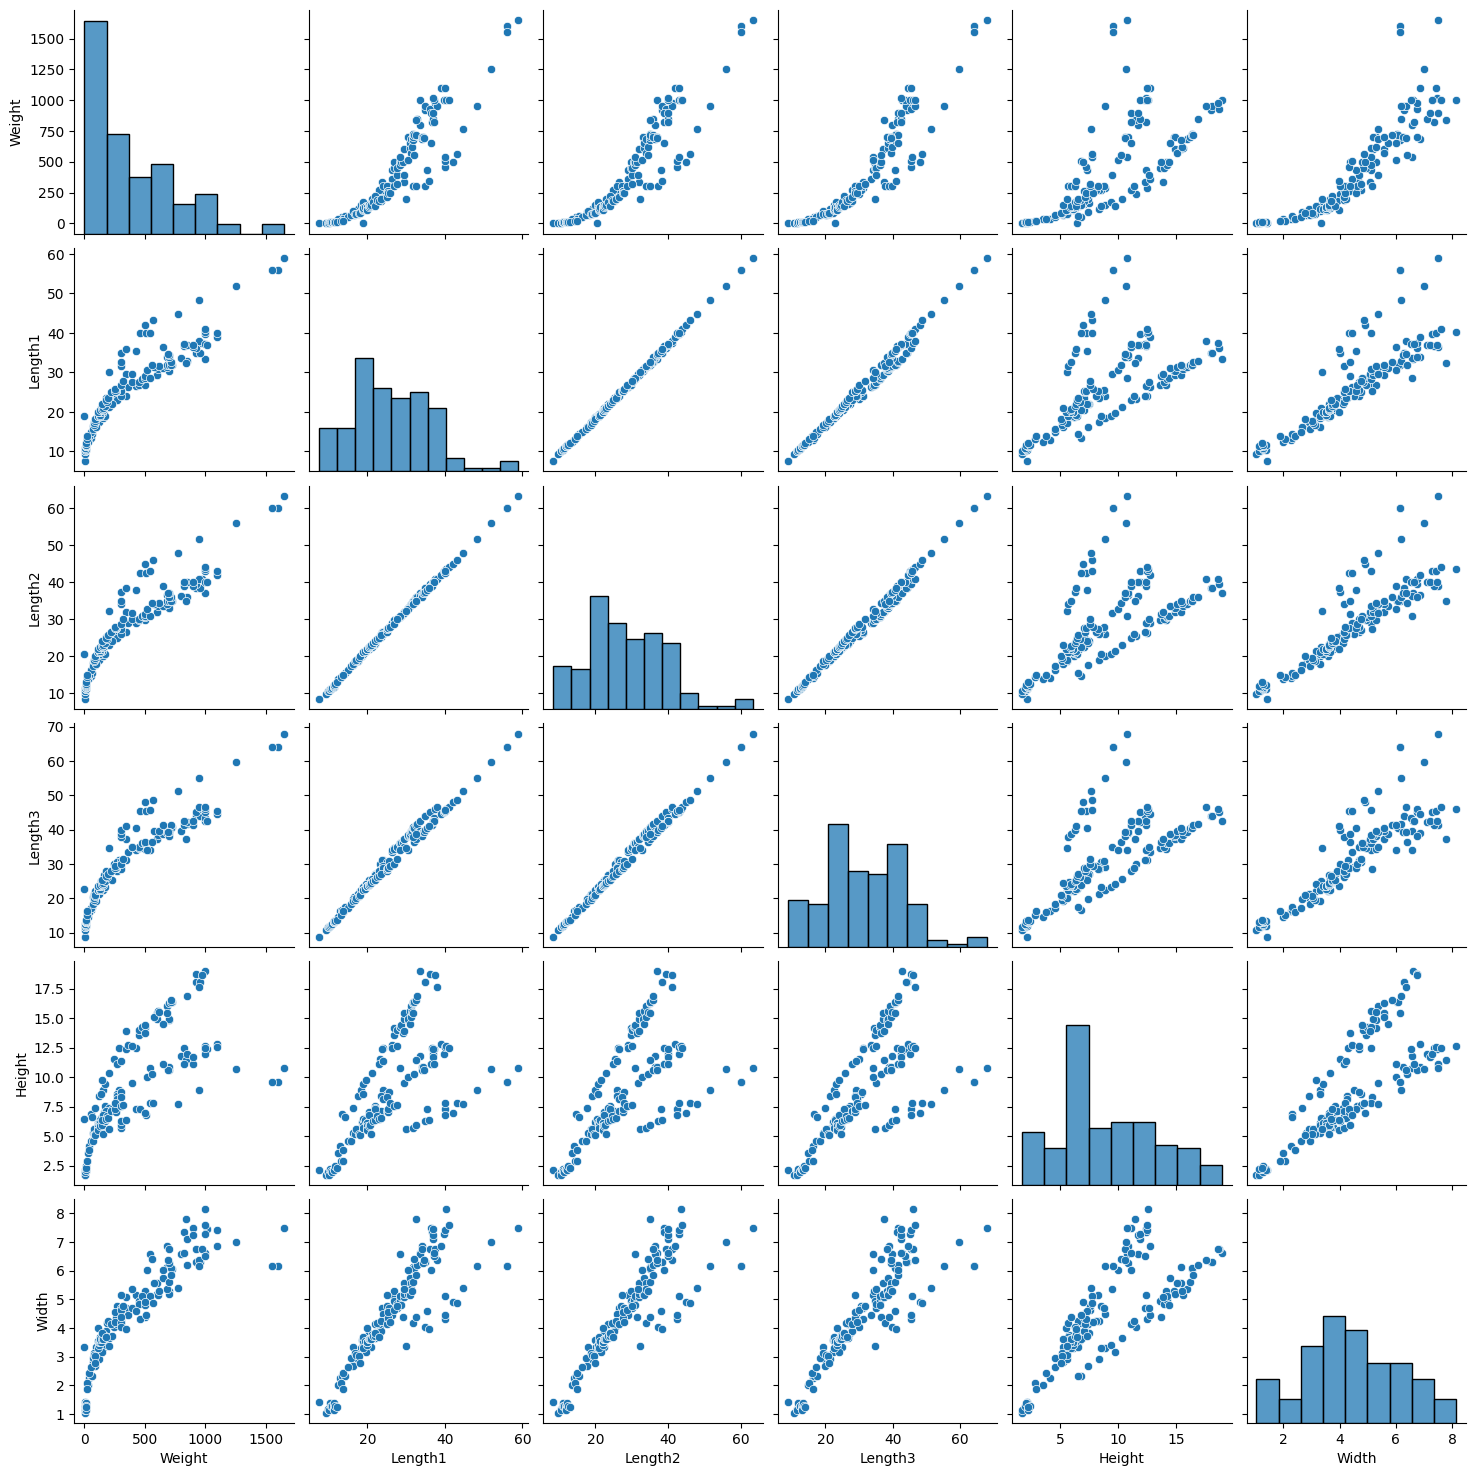

In [ ]:
sb.pairplot(Fish_data)

<Axes: xlabel='Weight', ylabel='Length1'>

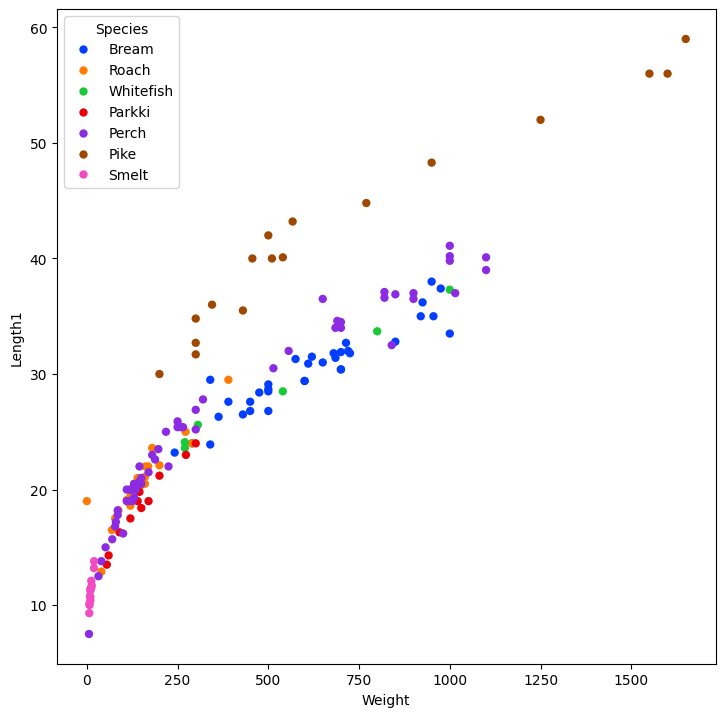

In [ ]:
f, ax = plt.subplots(figsize=(8.5, 8.5))
sb.scatterplot(x="Weight", y="Length1",
                hue="Species",
                sizes=(1, 18), linewidth=0,
                palette="bright",
                data=Fish_data, ax=ax)

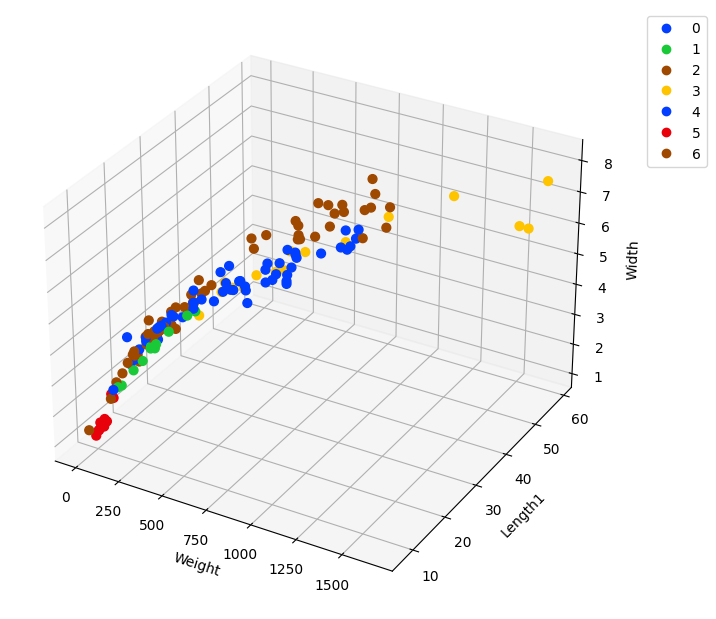

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
Fish_data['Species'] = LabelEncoder().fit_transform(Fish_data['Species'])
# generate data
n = 200
x = Fish_data['Weight']
y = Fish_data['Length1']
z = Fish_data['Width']
speciesVal = Fish_data['Species']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=speciesVal, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Weight')
ax.set_ylabel('Length1')
ax.set_zlabel('Width')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Bream', 'Species'] = 0

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Whitefish', 'Species'] = 1

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Pike', 'Species'] = 2

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Roach', 'Species'] = 3

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Perch', 'Species'] = 4

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Parkki', 'Species'] = 5

In [ ]:
Fish_data.loc[Fish_data['Species'] == 'Smelt', 'Species'] = 6

In [ ]:
display(Fish_data)

Species  Weight  Length1  Length2  Length3   Height   Width
0          0   242.0     23.2     25.4     30.0  11.5200  4.0200
1          0   290.0     24.0     26.3     31.2  12.4800  4.3056
2          0   340.0     23.9     26.5     31.1  12.3778  4.6961
3          0   363.0     26.3     29.0     33.5  12.7300  4.4555
4          0   430.0     26.5     29.0     34.0  12.4440  5.1340
..       ...     ...      ...      ...      ...      ...     ...
154        5    12.2     11.5     12.2     13.4   2.0904  1.3936
155        5    13.4     11.7     12.4     13.5   2.4300  1.2690
156        5    12.2     12.1     13.0     13.8   2.2770  1.2558
157        5    19.7     13.2     14.3     15.2   2.8728  2.0672
158        5    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [ ]:
fish_input = Fish_data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].copy()

In [ ]:
fish_output = Fish_data[['Species']].copy()

In [ ]:
fish_output.describe()

Species
count  159.000000
mean     2.264151
std      1.704249
min      0.000000
25%      1.000000
50%      2.000000
75%      3.500000
max      6.000000

In [ ]:
fish_input_numpy = fish_input.to_numpy()
fish_output_numpy= fish_output.to_numpy()

In [ ]:
fish_input_numpy = np.asarray(fish_input_numpy ).astype('float32')
fish_output_numpy = np.asarray(fish_output_numpy ).astype('float32')

In [ ]:
print(len(fish_input_numpy))

159


In [ ]:
fish_input_numpy.shape

(159, 6)

In [ ]:
#split the data into test and training set
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(fish_input_numpy, fish_output_numpy, test_size=0.2, random_state=42)

# Verify the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (127, 6)
X_test shape: (32, 6)
y_train shape: (127, 1)
y_test shape: (32, 1)


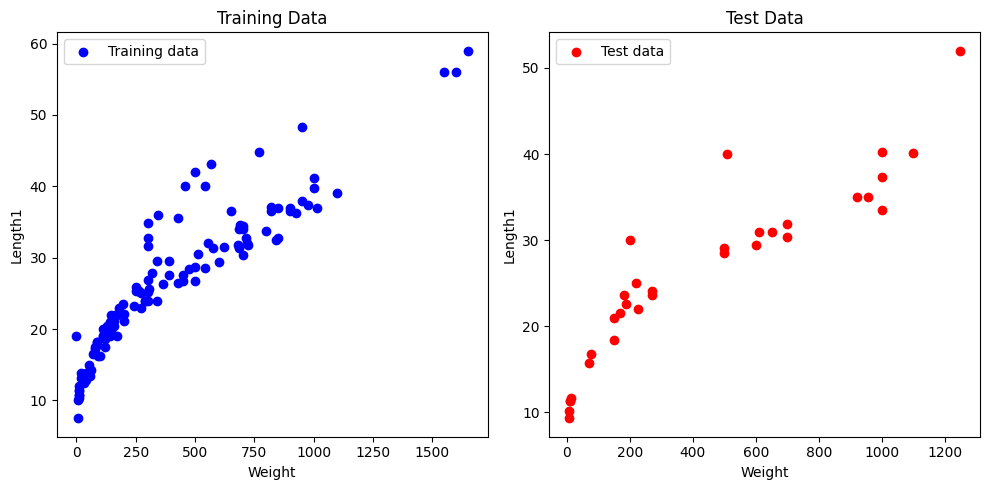

In [ ]:
import matplotlib.pyplot as plt

# Plot training data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Training data')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('Training Data')
plt.legend()

# Plot test data
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test data')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('Test Data')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
print(len(Fish_data['Species'].unique())) #OUTPUT NODE FOR THIS PREDICTION OF THIS DATASET

7


In [ ]:
modelO1P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='relu', input_shape=(X_train.shape[1],)), #Uses Activation Relu
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO2P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='relu', input_shape=(X_train.shape[1],)), # Uses Activation Relu
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO3P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='relu', input_shape=(X_train.shape[1],)), #Uses Activation Relu
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO4P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='relu', input_shape=(X_train.shape[1],)), #Uses Activation Relu
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO5P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='relu', input_shape=(X_train.shape[1],)), #Uses Activation Relu
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO6P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)), #Uses Activation Sigmoid
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO7P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)), #Uses Activation Sigmoid #Original
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO8P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)), #Uses Activation Sigmoid
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO9P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)), #Uses Activation Sigmoid
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
model10P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)), #Uses Activation Sigmoid
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
model11P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='tanh', input_shape=(X_train.shape[1],)), #Uses activation Tanh
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
model12P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='tanh', input_shape=(X_train.shape[1],)), #Uses activation Tanh
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
model13P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='tanh', input_shape=(X_train.shape[1],)), #Uses activation Tanh
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
model14P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='tanh', input_shape=(X_train.shape[1],)), #Uses activation Tanh
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
model15P = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='tanh', input_shape=(X_train.shape[1],)), #Uses activation Tanh
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')
])

In [ ]:
modelO1P.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate), #Uses Relu with Adamax
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [ ]:
modelO2P.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), #Uses Relu with Adam
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO3P.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), #Uses Relu with SGD
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO4P.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate), #Uses Relu with nadam
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO5P.compile(optimizer=tf.keras.optimizers.Ftrl(learning_rate=learning_rate), #Uses Relu with ftrl
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO6P.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate), #Uses Sigmoid with Adamax
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO7P.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), #Uses Sigmoid with Adam #Original
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO8P.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), #Uses Sigmoid with SGD
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
modelO9P.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate), #Uses Sigmoid with nadam
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model10P.compile(optimizer=tf.keras.optimizers.Ftrl(learning_rate=learning_rate), #Uses Sigmoid with ftrl
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model11P.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate), #Uses Tanh with Adamax
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model12P.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), #Uses Tanh with Adam
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model13P.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), #Uses Tanh with SGD
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model14P.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate), #Uses Tanh with nadam
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model15P.compile(optimizer=tf.keras.optimizers.Ftrl(learning_rate=learning_rate), #Uses Tanh with ftrl
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
batch_size = 1

In [ ]:
historyO1 = modelO1P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 6ms/step - loss: 43.9343 - accuracy: 0.3366 - val_loss: 12.2310 - val_accuracy: 0.3462
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 9.5626 - accuracy: 0.2673 - val_loss: 8.8740 - val_accuracy: 0.2692
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 7.3725 - accuracy: 0.2772 - val_loss: 6.3651 - val_accuracy: 0.3462
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 5.2674 - accuracy: 0.2574 - val_loss: 5.5732 - val_accuracy: 0.4231
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 5.0393 - accuracy: 0.2772 - val_loss: 5.5892 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 4.2302 - accuracy: 0.2673 - val_loss: 4.5708 - val_accuracy: 0.3462
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 3.6118 - accuracy: 0.1980 - val_loss: 5.3418 - val_accuracy: 0.26

In [ ]:
historyO2 = modelO2P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 5ms/step - loss: 19.1833 - accuracy: 0.1584 - val_loss: 4.4791 - val_accuracy: 0.1154
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 4.3174 - accuracy: 0.2673 - val_loss: 1.5829 - val_accuracy: 0.2692
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4270 - accuracy: 0.2970 - val_loss: 1.5543 - val_accuracy: 0.4231
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.3732 - accuracy: 0.3366 - val_loss: 1.4733 - val_accuracy: 0.3462
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4389 - accuracy: 0.3069 - val_loss: 1.5004 - val_accuracy: 0.3077
Epoch 6/250
101/101 [==============================] - 0s 2ms/step - loss: 1.3870 - accuracy: 0.3069 - val_loss: 1.4203 - val_accuracy: 0.4231
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7448 - accuracy: 0.2475 - val_loss: 1.6965 - val_accuracy: 0.192

In [ ]:
historyO3 = modelO3P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 6ms/step - loss: 8.9323 - accuracy: 0.3069 - val_loss: 1.8921 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 1s 5ms/step - loss: 1.8566 - accuracy: 0.3663 - val_loss: 1.8479 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 1s 6ms/step - loss: 1.7979 - accuracy: 0.3663 - val_loss: 1.8190 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7592 - accuracy: 0.3762 - val_loss: 1.8015 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7319 - accuracy: 0.3762 - val_loss: 1.7902 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7124 - accuracy: 0.3762 - val_loss: 1.7839 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6986 - accuracy: 0.3762 - val_loss: 1.7817 - val_accuracy: 0.3846

In [ ]:
historyO4 = modelO4P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 2s 5ms/step - loss: 33.5714 - accuracy: 0.2079 - val_loss: 6.1469 - val_accuracy: 0.3462
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 6.9053 - accuracy: 0.2376 - val_loss: 7.1120 - val_accuracy: 0.0769
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 5.7137 - accuracy: 0.2079 - val_loss: 2.6764 - val_accuracy: 0.1154
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 3.6545 - accuracy: 0.1584 - val_loss: 5.2386 - val_accuracy: 0.1923
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 4.0670 - accuracy: 0.2178 - val_loss: 2.8983 - val_accuracy: 0.1538
Epoch 6/250
101/101 [==============================] - 1s 6ms/step - loss: 2.3205 - accuracy: 0.2574 - val_loss: 5.6285 - val_accuracy: 0.2308
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 2.9428 - accuracy: 0.2772 - val_loss: 2.6581 - val_accuracy: 0.269

In [ ]:
historyO5 = modelO5P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 10.1400 - accuracy: 0.2871 - val_loss: 4.3519 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 2.6364 - accuracy: 0.2970 - val_loss: 2.8416 - val_accuracy: 0.2308
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 2.1794 - accuracy: 0.3267 - val_loss: 3.1865 - val_accuracy: 0.0769
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9774 - accuracy: 0.3267 - val_loss: 2.0987 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7248 - accuracy: 0.4356 - val_loss: 1.8276 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5993 - accuracy: 0.4554 - val_loss: 1.7362 - val_accuracy: 0.4615
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5746 - accuracy: 0.4059 - val_loss: 1.6206 - val_accuracy: 0.500

In [ ]:
historyO6 = modelO6P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8328 - accuracy: 0.2772 - val_loss: 1.9463 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6514 - accuracy: 0.3564 - val_loss: 1.8665 - val_accuracy: 0.4231
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5986 - accuracy: 0.3762 - val_loss: 1.7800 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5630 - accuracy: 0.3762 - val_loss: 1.7353 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5281 - accuracy: 0.3762 - val_loss: 1.6625 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4914 - accuracy: 0.3762 - val_loss: 1.5823 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4663 - accuracy: 0.3861 - val_loss: 1.5401 - val_accuracy: 0.3846

In [ ]:
historyO7 = modelO7P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8288 - accuracy: 0.3069 - val_loss: 1.6551 - val_accuracy: 0.5385
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5501 - accuracy: 0.3564 - val_loss: 1.5345 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4963 - accuracy: 0.3960 - val_loss: 1.4855 - val_accuracy: 0.5385
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4361 - accuracy: 0.3960 - val_loss: 1.5432 - val_accuracy: 0.5000
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4079 - accuracy: 0.3861 - val_loss: 1.4343 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.3890 - accuracy: 0.3663 - val_loss: 1.3799 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.3761 - accuracy: 0.3861 - val_loss: 1.4036 - val_accuracy: 0.5385

In [ ]:
historyO8 = modelO8P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.9262 - accuracy: 0.1980 - val_loss: 1.7849 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7194 - accuracy: 0.3663 - val_loss: 1.7365 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6809 - accuracy: 0.3663 - val_loss: 1.7296 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6676 - accuracy: 0.3663 - val_loss: 1.7337 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6493 - accuracy: 0.3663 - val_loss: 1.7295 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6426 - accuracy: 0.3663 - val_loss: 1.7071 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6546 - accuracy: 0.3366 - val_loss: 1.6993 - val_accuracy: 0.3846

In [ ]:
historyO9 = modelO9P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.6773 - accuracy: 0.3465 - val_loss: 1.4774 - val_accuracy: 0.4231
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5311 - accuracy: 0.3861 - val_loss: 1.3934 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4246 - accuracy: 0.3861 - val_loss: 1.4195 - val_accuracy: 0.5000
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4657 - accuracy: 0.3762 - val_loss: 1.4224 - val_accuracy: 0.5385
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4614 - accuracy: 0.4059 - val_loss: 1.3696 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.3875 - accuracy: 0.3960 - val_loss: 1.3971 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.3667 - accuracy: 0.3564 - val_loss: 1.4370 - val_accuracy: 0.5385

In [ ]:
history10 = model10P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 2s 7ms/step - loss: 1.7999 - accuracy: 0.2772 - val_loss: 1.7780 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6671 - accuracy: 0.3663 - val_loss: 1.7502 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 5ms/step - loss: 1.6261 - accuracy: 0.3663 - val_loss: 1.7404 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6018 - accuracy: 0.3663 - val_loss: 1.7274 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5861 - accuracy: 0.3663 - val_loss: 1.7162 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5711 - accuracy: 0.3663 - val_loss: 1.7058 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5608 - accuracy: 0.3663 - val_loss: 1.7022 - val_accuracy: 0.3846

In [ ]:
history11 = model11P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8031 - accuracy: 0.3267 - val_loss: 1.6984 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6530 - accuracy: 0.3168 - val_loss: 1.5305 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4535 - accuracy: 0.3168 - val_loss: 1.4531 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4365 - accuracy: 0.3762 - val_loss: 1.4056 - val_accuracy: 0.5385
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.3798 - accuracy: 0.4158 - val_loss: 1.3615 - val_accuracy: 0.5769
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.3593 - accuracy: 0.3663 - val_loss: 1.3441 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.3868 - accuracy: 0.3762 - val_loss: 1.3383 - val_accuracy: 0.5385

In [ ]:
history12 = model12P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8107 - accuracy: 0.2871 - val_loss: 1.5665 - val_accuracy: 0.5385
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.8052 - accuracy: 0.2376 - val_loss: 1.7416 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5863 - accuracy: 0.3564 - val_loss: 1.7577 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5657 - accuracy: 0.3564 - val_loss: 1.6040 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5955 - accuracy: 0.3663 - val_loss: 1.6102 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7003 - accuracy: 0.3168 - val_loss: 1.6152 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6557 - accuracy: 0.3465 - val_loss: 1.5898 - val_accuracy: 0.5385

In [ ]:
history13 = model13P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 8ms/step - loss: 1.9906 - accuracy: 0.2277 - val_loss: 1.5839 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 1s 6ms/step - loss: 1.6872 - accuracy: 0.2970 - val_loss: 1.5123 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 1s 6ms/step - loss: 1.7438 - accuracy: 0.3564 - val_loss: 1.5175 - val_accuracy: 0.5385
Epoch 4/250
101/101 [==============================] - 1s 5ms/step - loss: 1.7591 - accuracy: 0.2970 - val_loss: 1.6326 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6595 - accuracy: 0.3564 - val_loss: 1.6615 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6901 - accuracy: 0.2772 - val_loss: 1.6121 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6587 - accuracy: 0.2871 - val_loss: 1.7173 - val_accuracy: 0.5385

In [ ]:
history14 = model14P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 5ms/step - loss: 2.0494 - accuracy: 0.2970 - val_loss: 1.9496 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7956 - accuracy: 0.3069 - val_loss: 1.9605 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7832 - accuracy: 0.2376 - val_loss: 1.8027 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7211 - accuracy: 0.3465 - val_loss: 1.8284 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.8045 - accuracy: 0.4059 - val_loss: 1.9766 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 2ms/step - loss: 1.7605 - accuracy: 0.3168 - val_loss: 2.0139 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7633 - accuracy: 0.2871 - val_loss: 1.8165 - val_accuracy: 0.3846

In [ ]:
history15 = model15P.fit(X_train, y_train, epochs=max_epochs,batch_size = batch_size, validation_split=0.2)

Epoch 1/250
101/101 [==============================] - 1s 7ms/step - loss: 1.7843 - accuracy: 0.3168 - val_loss: 1.7338 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7123 - accuracy: 0.3663 - val_loss: 1.7197 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6732 - accuracy: 0.3663 - val_loss: 1.7086 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6334 - accuracy: 0.3762 - val_loss: 1.7030 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6010 - accuracy: 0.3663 - val_loss: 1.7267 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6006 - accuracy: 0.3564 - val_loss: 1.6722 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 1s 5ms/step - loss: 1.5904 - accuracy: 0.3663 - val_loss: 1.6764 - val_accuracy: 0.3846

In [ ]:
test_lossO1, test_accuracyO1 = modelO1P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO1*100:.2f}')
print(f'Test Accuracy: {test_accuracyO1*100:.2f}')

Test Loss: 140.02
Test Accuracy: 81.25


In [ ]:
test_lossO2, test_accuracyO2 = modelO2P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO2*100:.2f}')
print(f'Test Accuracy: {test_accuracyO2*100:.2f}')

Test Loss: 148.45
Test Accuracy: 43.75


In [ ]:
test_lossO3, test_accuracyO3 = modelO3P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO3*100:.2f}')
print(f'Test Accuracy: {test_accuracyO3*100:.2f}')

Test Loss: 199.72
Test Accuracy: 28.12


In [ ]:
test_lossO4, test_accuracyO4 = modelO4P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO4*100:.2f}')
print(f'Test Accuracy: {test_accuracyO4*100:.2f}')

Test Loss: 120.25
Test Accuracy: 56.25


In [ ]:
test_lossO5, test_accuracyO5 = modelO5P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO5*100:.2f}')
print(f'Test Accuracy: {test_accuracyO5*100:.2f}')

Test Loss: 101.97
Test Accuracy: 62.50


In [ ]:
test_lossO6, test_accuracyO6 = modelO6P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO6*100:.2f}')
print(f'Test Accuracy: {test_accuracyO6*100:.2f}')

Test Loss: 80.29
Test Accuracy: 81.25


In [ ]:
test_lossO7, test_accuracyO7 = modelO7P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO7*100:.2f}')
print(f'Test Accuracy: {test_accuracyO7*100:.2f}')

Test Loss: 148.96
Test Accuracy: 43.75


In [ ]:
test_lossO8, test_accuracyO8 = modelO8P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO8*100:.2f}')
print(f'Test Accuracy: {test_accuracyO8*100:.2f}')

Test Loss: 162.85
Test Accuracy: 43.75


In [ ]:
test_lossO9, test_accuracyO9 = modelO9P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_lossO9*100:.2f}')
print(f'Test Accuracy: {test_accuracyO9*100:.2f}')

Test Loss: 142.90
Test Accuracy: 43.75


In [ ]:
test_loss10, test_accuracy10 = model10P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss10*100:.2f}')
print(f'Test Accuracy: {test_accuracy10*100:.2f}')

Test Loss: 140.94
Test Accuracy: 68.75


In [ ]:
test_loss11, test_accuracy11 = model11P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss11*100:.2f}')
print(f'Test Accuracy: {test_accuracy11*100:.2f}')

Test Loss: 136.92
Test Accuracy: 43.75


In [ ]:
test_loss12, test_accuracy12 = model12P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss12*100:.2f}')
print(f'Test Accuracy: {test_accuracy12*100:.2f}')

Test Loss: 156.12
Test Accuracy: 43.75


In [ ]:
test_loss13, test_accuracy13 = model13P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss13*100:.2f}')
print(f'Test Accuracy: {test_accuracy13*100:.2f}')

Test Loss: 154.15
Test Accuracy: 43.75


In [ ]:
test_loss14, test_accuracy14 = model14P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss14*100:.2f}')
print(f'Test Accuracy: {test_accuracy14*100:.2f}')

Test Loss: 163.79
Test Accuracy: 43.75


In [ ]:
test_loss15, test_accuracy15 = model15P.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss15*100:.2f}')
print(f'Test Accuracy: {test_accuracy15*100:.2f}')

Test Loss: 135.88
Test Accuracy: 68.75


In [ ]:
print("  Test Accuracy Comparison             Different Model")
print("         Model                           |       Test Accuracy       \n")
print("          Relu & Adamax            ",'             {:.5f}'.format(test_accuracyO1))
print("          Relu & Adam               ",'            {:.5f}'.format(test_accuracyO2))
print("          Relu & SGD               ",'             {:.5f}'.format(test_accuracyO3))
print("          Relu & Nadam             ",'             {:.5f}'.format(test_accuracyO4))
print("          Relu & Ftrl            ",'               {:.5f}'.format(test_accuracyO5))
print("         Sigmoid & Adamax            ",'           {:.5f}'.format(test_accuracyO6))
print("         Sigmoid & Adam             ",'            {:.5f}'.format(test_accuracyO7))
print("         Sigmoid & SGD            ",'              {:.5f}'.format(test_accuracyO8))
print("         Sigmoid & Nadam           ",'             {:.5f}'.format(test_accuracyO9))
print("         Sigmoid & Ftrl             ",'            {:.5f}'.format(test_accuracy10))
print("          tanh & Adamax              ",'           {:.5f}'.format(test_accuracy11))
print("          tanh & Adam               ",'            {:.5f}'.format(test_accuracy12))
print("          tanh & SGD                ",'            {:.5f}'.format(test_accuracy13))
print("          tanh & Nadam               ",'           {:.5f}'.format(test_accuracy14))
print("          tanh & Ftrl                ",'           {:.5f}'.format(test_accuracy15))





  Test Accuracy Comparison             Different Model
         Model                           |       Test Accuracy       

          Relu & Adamax                          0.81250
          Relu & Adam                            0.43750
          Relu & SGD                             0.28125
          Relu & Nadam                           0.56250
          Relu & Ftrl                            0.62500
         Sigmoid & Adamax                        0.81250
         Sigmoid & Adam                          0.43750
         Sigmoid & SGD                           0.43750
         Sigmoid & Nadam                         0.43750
         Sigmoid & Ftrl                          0.68750
          tanh & Adamax                          0.43750
          tanh & Adam                            0.43750
          tanh & SGD                             0.43750
          tanh & Nadam                           0.43750
          tanh & Ftrl                            0.68750


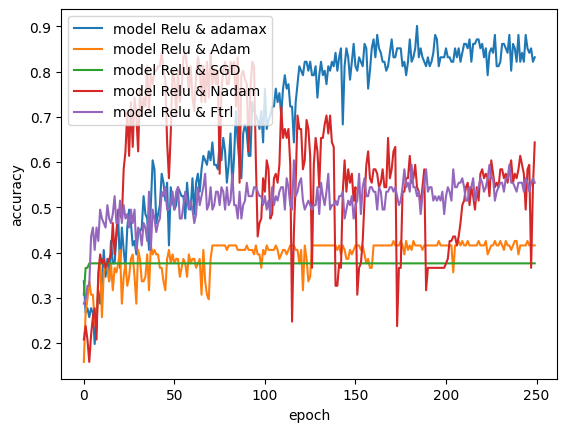

In [ ]:
plt.plot(historyO1.history['accuracy'])
plt.plot(historyO2.history['accuracy'])
plt.plot(historyO3.history['accuracy'])
plt.plot(historyO4.history['accuracy'])
plt.plot(historyO5.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Relu & adamax','model Relu & Adam','model Relu & SGD','model Relu & Nadam','model Relu & Ftrl'],loc='upper left')
plt.show()

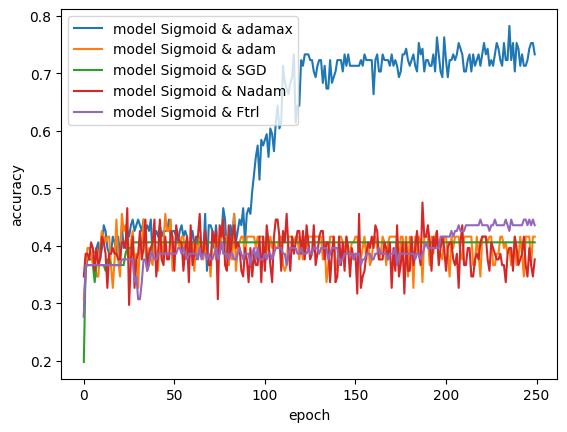

In [ ]:
plt.plot(historyO6.history['accuracy'])
plt.plot(historyO7.history['accuracy'])
plt.plot(historyO8.history['accuracy'])
plt.plot(historyO9.history['accuracy'])
plt.plot(history10.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Sigmoid & adamax','model Sigmoid & adam','model Sigmoid & SGD','model Sigmoid & Nadam','model Sigmoid & Ftrl'],loc='upper left')
plt.show()

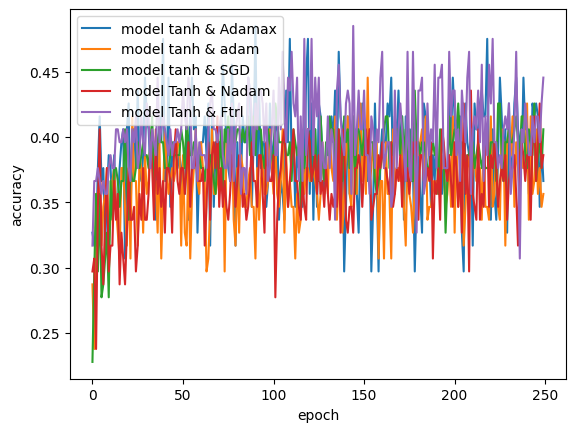

In [ ]:
plt.plot(history11.history['accuracy'])
plt.plot(history12.history['accuracy'])
plt.plot(history13.history['accuracy'])
plt.plot(history14.history['accuracy'])
plt.plot(history15.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model tanh & Adamax','model tanh & adam','model tanh & SGD','model Tanh & Nadam','model Tanh & Ftrl'],loc='upper left')
plt.show()

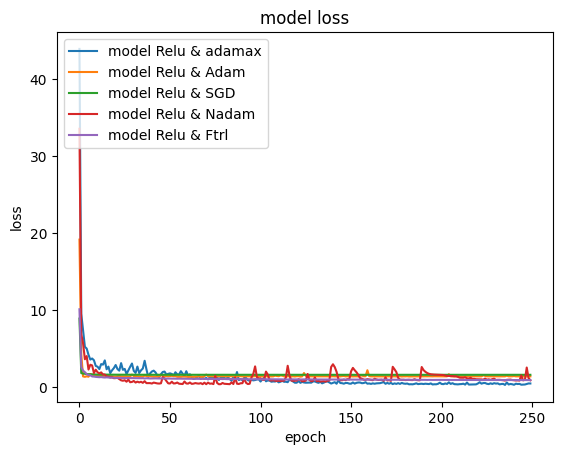

In [ ]:
plt.plot(historyO1.history['loss'])
plt.plot(historyO2.history['loss'])
plt.plot(historyO3.history['loss'])
plt.plot(historyO4.history['loss'])
plt.plot(historyO5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Relu & adamax','model Relu & Adam','model Relu & SGD','model Relu & Nadam','model Relu & Ftrl'], loc='upper left')
plt.show()

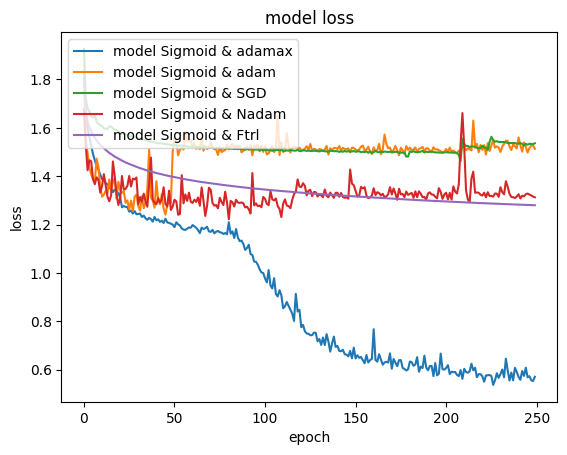

In [ ]:
plt.plot(historyO6.history['loss'])
plt.plot(historyO7.history['loss'])
plt.plot(historyO8.history['loss'])
plt.plot(historyO9.history['loss'])
plt.plot(history10.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Sigmoid & adamax','model Sigmoid & adam','model Sigmoid & SGD','model Sigmoid & Nadam','model Sigmoid & Ftrl'], loc='upper left')
plt.show()

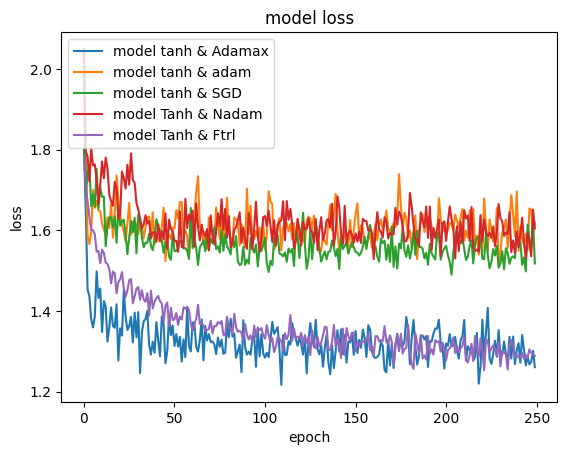

In [ ]:
plt.plot(history11.history['loss'])
plt.plot(history12.history['loss'])
plt.plot(history13.history['loss'])
plt.plot(history14.history['loss'])
plt.plot(history15.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model tanh & Adamax','model tanh & adam','model tanh & SGD','model Tanh & Nadam','model Tanh & Ftrl'], loc='upper left')
plt.show()

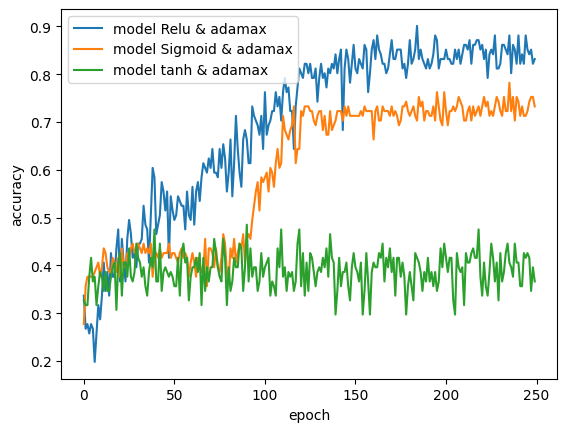

In [ ]:
plt.plot(historyO1.history['accuracy'])
plt.plot(historyO6.history['accuracy'])
plt.plot(history11.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Relu & adamax','model Sigmoid & adamax','model tanh & adamax'],loc='upper left')
plt.show()

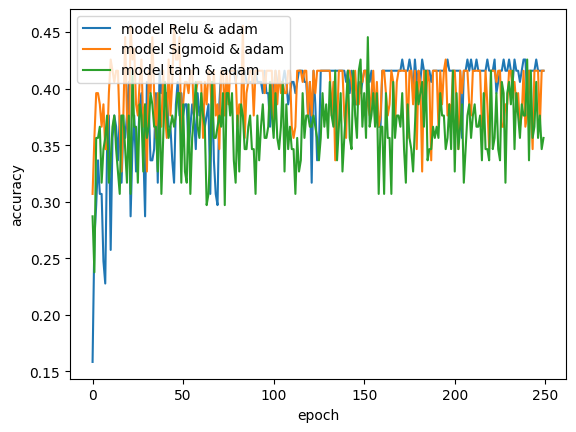

In [ ]:
plt.plot(historyO2.history['accuracy'])
plt.plot(historyO7.history['accuracy'])
plt.plot(history12.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Relu & adam','model Sigmoid & adam','model tanh & adam'],loc='upper left')
plt.show()

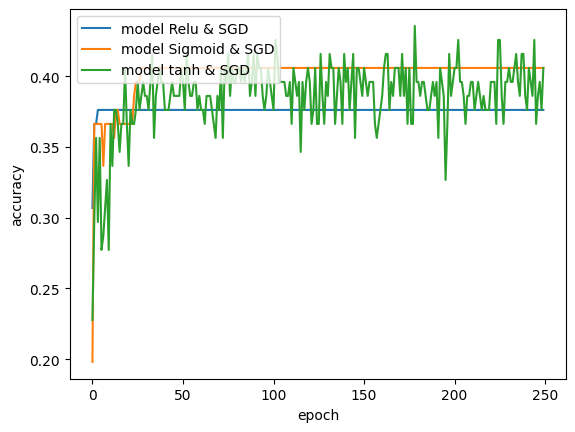

In [ ]:
plt.plot(historyO3.history['accuracy'])
plt.plot(historyO8.history['accuracy'])
plt.plot(history13.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Relu & SGD','model Sigmoid & SGD','model tanh & SGD'],loc='upper left')
plt.show()

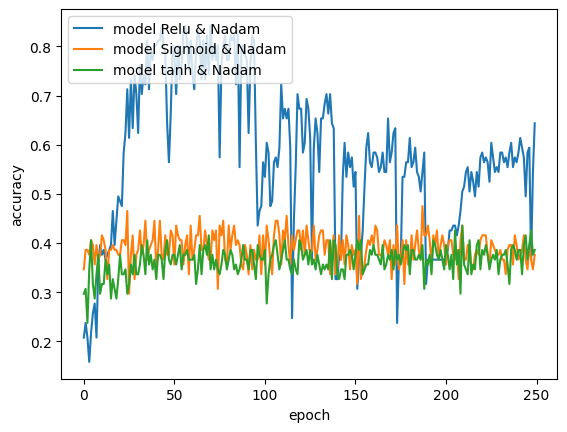

In [ ]:
plt.plot(historyO4.history['accuracy'])
plt.plot(historyO9.history['accuracy'])
plt.plot(history14.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Relu & Nadam','model Sigmoid & Nadam','model tanh & Nadam'],loc='upper left')
plt.show()

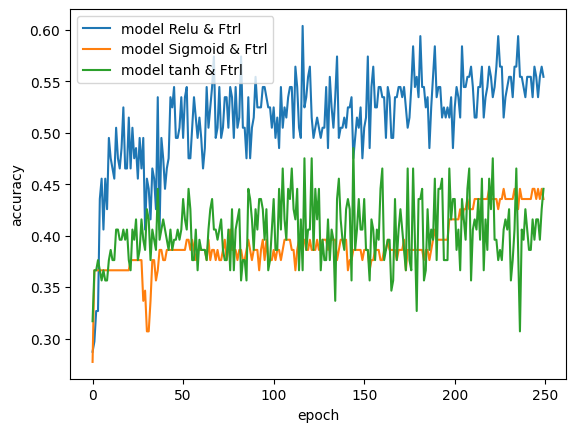

In [ ]:
plt.plot(historyO5.history['accuracy'])
plt.plot(history10.history['accuracy'])
plt.plot(history15.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model Relu & Ftrl','model Sigmoid & Ftrl','model tanh & Ftrl'],loc='upper left')
plt.show()

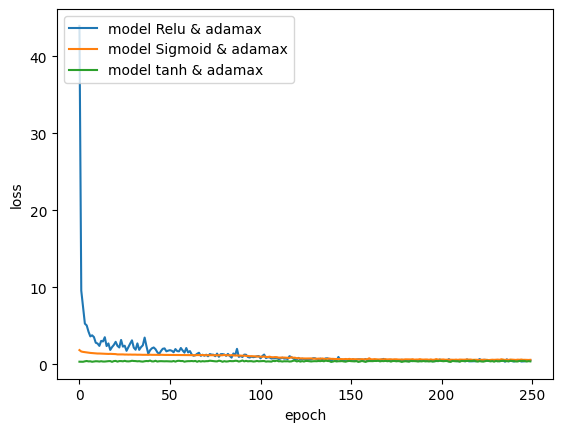

In [ ]:
plt.plot(historyO1.history['loss'])
plt.plot(historyO6.history['loss'])
plt.plot(history11.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Relu & adamax','model Sigmoid & adamax','model tanh & adamax'],loc='upper left')
plt.show()

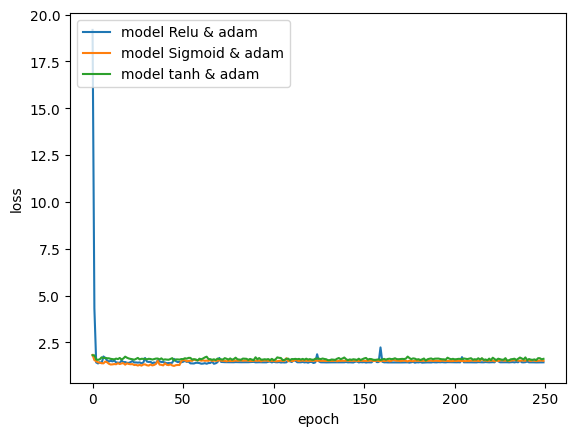

In [ ]:
plt.plot(historyO2.history['loss'])
plt.plot(historyO7.history['loss'])
plt.plot(history12.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Relu & adam','model Sigmoid & adam','model tanh & adam'],loc='upper left')
plt.show()

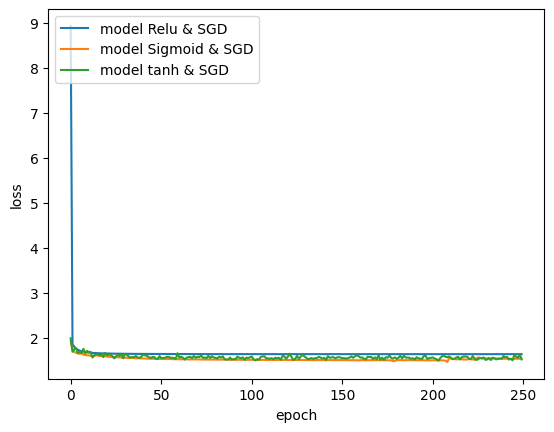

In [ ]:
plt.plot(historyO3.history['loss'])
plt.plot(historyO8.history['loss'])
plt.plot(history13.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Relu & SGD','model Sigmoid & SGD','model tanh & SGD'],loc='upper left')
plt.show()

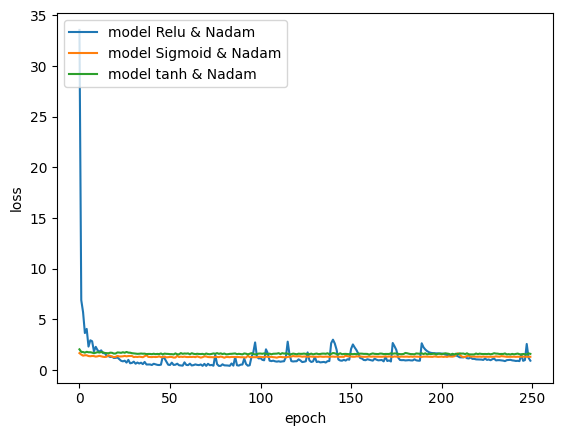

In [ ]:
plt.plot(historyO4.history['loss'])
plt.plot(historyO9.history['loss'])
plt.plot(history14.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Relu & Nadam','model Sigmoid & Nadam','model tanh & Nadam'],loc='upper left')
plt.show()

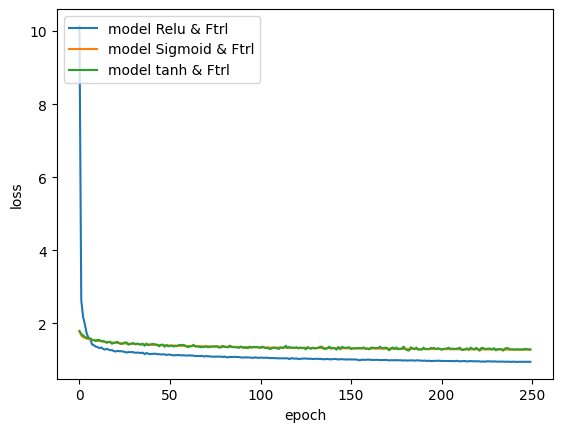

In [ ]:
plt.plot(historyO5.history['loss'])
plt.plot(history10.history['loss'])
plt.plot(history15.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model Relu & Ftrl','model Sigmoid & Ftrl','model tanh & Ftrl'],loc='upper left')
plt.show()

In [ ]:
#Finding the best hidden layer
hidden_nodes = 1
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model1HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model1HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1HL = model1HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss1HL, test_accuracy1HL = model1HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss1HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy1HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8950 - accuracy: 0.2178 - val_loss: 1.7789 - val_accuracy: 0.1923
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6733 - accuracy: 0.3663 - val_loss: 1.7207 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6283 - accuracy: 0.3663 - val_loss: 1.7188 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6069 - accuracy: 0.3663 - val_loss: 1.7126 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5949 - accuracy: 0.3663 - val_loss: 1.7082 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5900 - accuracy: 0.3663 - val_loss: 1.7022 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5838 - accuracy: 0.3663 - val_loss: 1.6788 - val_accuracy: 0.3846

In [ ]:
#Finding the best hidden layer
hidden_nodes = 2
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model2HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model2HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2HL = model2HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss2HL, test_accuracy2HL = model2HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss2HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy2HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8676 - accuracy: 0.2673 - val_loss: 1.8242 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7481 - accuracy: 0.3663 - val_loss: 1.8213 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7129 - accuracy: 0.3663 - val_loss: 1.8208 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6780 - accuracy: 0.3663 - val_loss: 1.8514 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6690 - accuracy: 0.3663 - val_loss: 1.8675 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6671 - accuracy: 0.3663 - val_loss: 1.8813 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6601 - accuracy: 0.3663 - val_loss: 1.8927 - val_accuracy: 0.3846

In [ ]:
#Finding the best hidden layer
hidden_nodes = 3
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model3HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model3HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history3HL = model3HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss3HL, test_accuracy3HL = model3HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss3HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy3HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 6ms/step - loss: 2.0496 - accuracy: 0.1584 - val_loss: 1.9270 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6653 - accuracy: 0.3663 - val_loss: 1.7762 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6461 - accuracy: 0.3663 - val_loss: 1.7849 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 1s 5ms/step - loss: 1.6262 - accuracy: 0.3663 - val_loss: 1.7561 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6363 - accuracy: 0.3663 - val_loss: 1.7442 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6136 - accuracy: 0.3663 - val_loss: 1.7318 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 1s 6ms/step - loss: 1.6072 - accuracy: 0.3663 - val_loss: 1.7002 - val_accuracy: 0.3846

In [ ]:
#Finding the best hidden layer
hidden_nodes = 4
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model4HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model4HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history4HL = model4HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss4HL, test_accuracy4HL = model4HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss4HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy4HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 7ms/step - loss: 1.7912 - accuracy: 0.2376 - val_loss: 1.7598 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6079 - accuracy: 0.3663 - val_loss: 1.6813 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5294 - accuracy: 0.3663 - val_loss: 1.6131 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4826 - accuracy: 0.3663 - val_loss: 1.5582 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.4082 - accuracy: 0.3861 - val_loss: 1.6886 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6192 - accuracy: 0.4158 - val_loss: 1.6302 - val_accuracy: 0.4615
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5737 - accuracy: 0.3762 - val_loss: 1.5705 - val_accuracy: 0.5385

In [ ]:
#Finding the best hidden layer
hidden_nodes = 5
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model5HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model5HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history5HL = model5HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss5HL, test_accuracy5HL = model5HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss5HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy5HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8814 - accuracy: 0.2277 - val_loss: 1.7741 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7005 - accuracy: 0.3663 - val_loss: 1.7919 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6714 - accuracy: 0.3663 - val_loss: 1.7071 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6235 - accuracy: 0.3663 - val_loss: 1.6951 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 1s 5ms/step - loss: 1.6049 - accuracy: 0.3663 - val_loss: 1.6689 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 5ms/step - loss: 1.5869 - accuracy: 0.3663 - val_loss: 1.6618 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5699 - accuracy: 0.3663 - val_loss: 1.6211 - val_accuracy: 0.3846

In [ ]:
#Finding the best hidden layer
hidden_nodes = 6
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model6HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model6HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history6HL = model6HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss6HL, test_accuracy6HL = model6HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss6HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy6HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.7417 - accuracy: 0.2277 - val_loss: 1.6863 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4978 - accuracy: 0.3861 - val_loss: 1.6515 - val_accuracy: 0.4231
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4547 - accuracy: 0.3267 - val_loss: 1.6109 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.4621 - accuracy: 0.3465 - val_loss: 1.5940 - val_accuracy: 0.5385
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.3995 - accuracy: 0.4059 - val_loss: 1.4979 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 5ms/step - loss: 1.3939 - accuracy: 0.4158 - val_loss: 1.5310 - val_accuracy: 0.4615
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.4396 - accuracy: 0.3960 - val_loss: 1.5268 - val_accuracy: 0.5385

In [ ]:
#Finding the best hidden layer
hidden_nodes = 7
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model7HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model7HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history7HL = model7HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss7HL, test_accuracy7HL = model7HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss7HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy7HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.6949 - accuracy: 0.3069 - val_loss: 1.6084 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5840 - accuracy: 0.3960 - val_loss: 1.5710 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5628 - accuracy: 0.4059 - val_loss: 1.5180 - val_accuracy: 0.5385
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5499 - accuracy: 0.4158 - val_loss: 1.6970 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.5742 - accuracy: 0.3465 - val_loss: 1.5874 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5416 - accuracy: 0.4059 - val_loss: 1.5367 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5133 - accuracy: 0.3960 - val_loss: 1.5314 - val_accuracy: 0.5385

In [ ]:
#Finding the best hidden layer
hidden_nodes = 8
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model8HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model8HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history8HL = model8HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss8HL, test_accuracy8HL = model8HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss8HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy8HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 2s 6ms/step - loss: 1.8101 - accuracy: 0.3069 - val_loss: 1.6469 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5286 - accuracy: 0.3168 - val_loss: 1.6338 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4460 - accuracy: 0.3465 - val_loss: 1.6187 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.4341 - accuracy: 0.3564 - val_loss: 1.5720 - val_accuracy: 0.5385
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.4539 - accuracy: 0.3465 - val_loss: 1.4631 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4165 - accuracy: 0.4059 - val_loss: 1.5691 - val_accuracy: 0.5769
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4748 - accuracy: 0.3762 - val_loss: 1.4711 - val_accuracy: 0.4615

In [ ]:
#Finding the best hidden layer
hidden_nodes = 9
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model9HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model9HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history9HL = model9HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss9HL, test_accuracy9HL = model9HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss9HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy9HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.7605 - accuracy: 0.2772 - val_loss: 1.8449 - val_accuracy: 0.3462
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5538 - accuracy: 0.3267 - val_loss: 1.7270 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5440 - accuracy: 0.3564 - val_loss: 1.6532 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4671 - accuracy: 0.3564 - val_loss: 1.5330 - val_accuracy: 0.4615
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4216 - accuracy: 0.3663 - val_loss: 1.4790 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.3891 - accuracy: 0.3861 - val_loss: 1.4856 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.4002 - accuracy: 0.3861 - val_loss: 1.5192 - val_accuracy: 0.5385

In [ ]:
#Finding the best hidden layer
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model10HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model10HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history10HL = model10HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss10HL, test_accuracy10HL = model10HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss10HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy10HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 5ms/step - loss: 1.7662 - accuracy: 0.3168 - val_loss: 1.7505 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6899 - accuracy: 0.3267 - val_loss: 1.7765 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6289 - accuracy: 0.3762 - val_loss: 1.6966 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6318 - accuracy: 0.3762 - val_loss: 1.7437 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6014 - accuracy: 0.3663 - val_loss: 1.6933 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5828 - accuracy: 0.3861 - val_loss: 1.6798 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.5806 - accuracy: 0.4059 - val_loss: 1.6299 - val_accuracy: 0.3846

In [ ]:
#Finding the best hidden layer
hidden_nodes = 15
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model11HL = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model11HL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history11HL = model11HL.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss11HL, test_accuracy11HL = model11HL.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss11HL*100:.2f}')
print(f'Test Accuracy: {test_accuracy11HL*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.9067 - accuracy: 0.2376 - val_loss: 1.6422 - val_accuracy: 0.5385
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6234 - accuracy: 0.3861 - val_loss: 1.6443 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 5ms/step - loss: 1.5786 - accuracy: 0.3960 - val_loss: 1.6579 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5560 - accuracy: 0.3960 - val_loss: 1.5996 - val_accuracy: 0.5385
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4758 - accuracy: 0.4158 - val_loss: 1.5107 - val_accuracy: 0.5000
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4983 - accuracy: 0.3069 - val_loss: 1.5591 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 2ms/step - loss: 1.5064 - accuracy: 0.3960 - val_loss: 1.4992 - val_accuracy: 0.5000

In [ ]:
print("   Test Accuracy Comparison (Different Hidden Nodes)\n")
print("        Hidden Nodes       |        Accuracy           \n")
print("             1           ",'          {:.5f}'.format(test_accuracy1HL))
print("             2           ",'          {:.5f}'.format(test_accuracy2HL))
print("             3           ",'          {:.5f}'.format(test_accuracy3HL))
print("             4           ",'          {:.5f}'.format(test_accuracy4HL))
print("             5           ",'          {:.5f}'.format(test_accuracy5HL))
print("             6           ",'          {:.5f}'.format(test_accuracy6HL))
print("             7           ",'          {:.5f}'.format(test_accuracy7HL))
print("             8           ",'          {:.5f}'.format(test_accuracy8HL))
print("             9           ",'          {:.5f}'.format(test_accuracy9HL))
print("             10          ",'          {:.5f}'.format(test_accuracy10HL))
print("             15          ",'          {:.5f}'.format(test_accuracy11HL))

   Test Accuracy Comparison (Different Hidden Nodes)

        Hidden Nodes       |        Accuracy           

             1                      0.43750
             2                      0.28125
             3                      0.43750
             4                      0.43750
             5                      0.43750
             6                      0.43750
             7                      0.37500
             8                      0.43750
             9                      0.65625
             10                     0.43750
             15                     0.65625


In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 25
max_error = 0.01
batch_size = 1
model1E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model1E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1E = model1E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss1E, test_accuracy1E = model1E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss1E*100:.2f}')
print(f'Test Accuracy: {test_accuracy1E*100:.2f}')

Epoch 1/25
101/101 [==============================] - 1s 7ms/step - loss: 1.7104 - accuracy: 0.3762 - val_loss: 1.5468 - val_accuracy: 0.5385
Epoch 2/25
101/101 [==============================] - 0s 4ms/step - loss: 1.5432 - accuracy: 0.3960 - val_loss: 1.5782 - val_accuracy: 0.5385
Epoch 3/25
101/101 [==============================] - 0s 4ms/step - loss: 1.5155 - accuracy: 0.4059 - val_loss: 1.5230 - val_accuracy: 0.5385
Epoch 4/25
101/101 [==============================] - 0s 4ms/step - loss: 1.4998 - accuracy: 0.3861 - val_loss: 1.5066 - val_accuracy: 0.5385
Epoch 5/25
101/101 [==============================] - 0s 4ms/step - loss: 1.4706 - accuracy: 0.3960 - val_loss: 1.4856 - val_accuracy: 0.5385
Epoch 6/25
101/101 [==============================] - 0s 4ms/step - loss: 1.4392 - accuracy: 0.3762 - val_loss: 1.4804 - val_accuracy: 0.5385
Epoch 7/25
101/101 [==============================] - 0s 4ms/step - loss: 1.4825 - accuracy: 0.3564 - val_loss: 1.4277 - val_accuracy: 0.5000
Epoch 

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 50
max_error = 0.01
batch_size = 1
model2E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model2E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2E = model2E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss2E, test_accuracy2E = model2E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss2E*100:.2f}')
print(f'Test Accuracy: {test_accuracy2E*100:.2f}')

Epoch 1/50
101/101 [==============================] - 1s 4ms/step - loss: 1.6831 - accuracy: 0.3762 - val_loss: 1.6357 - val_accuracy: 0.5385
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 1.5791 - accuracy: 0.4059 - val_loss: 1.5785 - val_accuracy: 0.5385
Epoch 3/50
101/101 [==============================] - 0s 2ms/step - loss: 1.5410 - accuracy: 0.4059 - val_loss: 1.5438 - val_accuracy: 0.5385
Epoch 4/50
101/101 [==============================] - 0s 4ms/step - loss: 1.5893 - accuracy: 0.3465 - val_loss: 1.5925 - val_accuracy: 0.5385
Epoch 5/50
101/101 [==============================] - 0s 4ms/step - loss: 1.4835 - accuracy: 0.4158 - val_loss: 1.5394 - val_accuracy: 0.5385
Epoch 6/50
101/101 [==============================] - 0s 4ms/step - loss: 1.4408 - accuracy: 0.3762 - val_loss: 1.5169 - val_accuracy: 0.5385
Epoch 7/50
101/101 [==============================] - 1s 5ms/step - loss: 1.4234 - accuracy: 0.4158 - val_loss: 1.5899 - val_accuracy: 0.5000
Epoch 

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 75
max_error = 0.01
batch_size = 1
model3E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model3E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history3E = model3E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss3E, test_accuracy3E = model3E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss3E*100:.2f}')
print(f'Test Accuracy: {test_accuracy3E*100:.2f}')

Epoch 1/75
101/101 [==============================] - 1s 6ms/step - loss: 1.7711 - accuracy: 0.3069 - val_loss: 1.6907 - val_accuracy: 0.3846
Epoch 2/75
101/101 [==============================] - 0s 4ms/step - loss: 1.6306 - accuracy: 0.3267 - val_loss: 1.6326 - val_accuracy: 0.3846
Epoch 3/75
101/101 [==============================] - 0s 3ms/step - loss: 1.6060 - accuracy: 0.3861 - val_loss: 1.6913 - val_accuracy: 0.5000
Epoch 4/75
101/101 [==============================] - 0s 3ms/step - loss: 1.6018 - accuracy: 0.3861 - val_loss: 1.6211 - val_accuracy: 0.5000
Epoch 5/75
101/101 [==============================] - 0s 3ms/step - loss: 1.5553 - accuracy: 0.4158 - val_loss: 1.5450 - val_accuracy: 0.5385
Epoch 6/75
101/101 [==============================] - 0s 3ms/step - loss: 1.5408 - accuracy: 0.4158 - val_loss: 1.5372 - val_accuracy: 0.5385
Epoch 7/75
101/101 [==============================] - 0s 2ms/step - loss: 1.5345 - accuracy: 0.4059 - val_loss: 1.5139 - val_accuracy: 0.5385
Epoch 

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 100
max_error = 0.01
batch_size = 1
model4E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model4E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history4E = model4E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss4E, test_accuracy4E = model4E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss4E*100:.2f}')
print(f'Test Accuracy: {test_accuracy4E*100:.2f}')

Epoch 1/100
101/101 [==============================] - 1s 5ms/step - loss: 1.7682 - accuracy: 0.3267 - val_loss: 1.7901 - val_accuracy: 0.3846
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 1.6267 - accuracy: 0.3465 - val_loss: 1.6895 - val_accuracy: 0.3846
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 1.5405 - accuracy: 0.3366 - val_loss: 1.5195 - val_accuracy: 0.5000
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 1.4625 - accuracy: 0.3861 - val_loss: 1.5827 - val_accuracy: 0.5385
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 1.4749 - accuracy: 0.3960 - val_loss: 1.6589 - val_accuracy: 0.5000
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 1.4540 - accuracy: 0.3564 - val_loss: 1.5844 - val_accuracy: 0.5385
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 1.5417 - accuracy: 0.3465 - val_loss: 1.5261 - val_accuracy: 0.5769

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 125
max_error = 0.01
batch_size = 1
model5E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model5E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history5E = model5E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss5E, test_accuracy5E = model5E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss5E*100:.2f}')
print(f'Test Accuracy: {test_accuracy5E*100:.2f}')

Epoch 1/125
101/101 [==============================] - 1s 4ms/step - loss: 1.8022 - accuracy: 0.3168 - val_loss: 1.5556 - val_accuracy: 0.5000
Epoch 2/125
101/101 [==============================] - 0s 3ms/step - loss: 1.5922 - accuracy: 0.3861 - val_loss: 1.5248 - val_accuracy: 0.5000
Epoch 3/125
101/101 [==============================] - 0s 2ms/step - loss: 1.5723 - accuracy: 0.3762 - val_loss: 1.6334 - val_accuracy: 0.5385
Epoch 4/125
101/101 [==============================] - 0s 4ms/step - loss: 1.5541 - accuracy: 0.3960 - val_loss: 1.4859 - val_accuracy: 0.5385
Epoch 5/125
101/101 [==============================] - 0s 4ms/step - loss: 1.5387 - accuracy: 0.3564 - val_loss: 1.4769 - val_accuracy: 0.5000
Epoch 6/125
101/101 [==============================] - 0s 3ms/step - loss: 1.5160 - accuracy: 0.3663 - val_loss: 1.5464 - val_accuracy: 0.3462
Epoch 7/125
101/101 [==============================] - 0s 4ms/step - loss: 1.5333 - accuracy: 0.3663 - val_loss: 1.4757 - val_accuracy: 0.5385

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 150
max_error = 0.01
batch_size = 1
model6E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model6E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history6E = model6E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss6E, test_accuracy6E = model6E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss6E*100:.2f}')
print(f'Test Accuracy: {test_accuracy6E*100:.2f}')

Epoch 1/150
101/101 [==============================] - 1s 5ms/step - loss: 1.8403 - accuracy: 0.2772 - val_loss: 1.6580 - val_accuracy: 0.5000
Epoch 2/150
101/101 [==============================] - 0s 3ms/step - loss: 1.5996 - accuracy: 0.3663 - val_loss: 1.5269 - val_accuracy: 0.5385
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 1.5884 - accuracy: 0.3564 - val_loss: 1.5788 - val_accuracy: 0.5385
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 1.5236 - accuracy: 0.4059 - val_loss: 1.5414 - val_accuracy: 0.5385
Epoch 5/150
101/101 [==============================] - 0s 3ms/step - loss: 1.4786 - accuracy: 0.3663 - val_loss: 1.4866 - val_accuracy: 0.5385
Epoch 6/150
101/101 [==============================] - 0s 4ms/step - loss: 1.4406 - accuracy: 0.3564 - val_loss: 1.5035 - val_accuracy: 0.5385
Epoch 7/150
101/101 [==============================] - 0s 5ms/step - loss: 1.3876 - accuracy: 0.4059 - val_loss: 1.5551 - val_accuracy: 0.4231

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 175
max_error = 0.01
batch_size = 1
model7E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model7E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history7E = model7E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss7E, test_accuracy7E = model7E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss7E*100:.2f}')
print(f'Test Accuracy: {test_accuracy7E*100:.2f}')

Epoch 1/175
101/101 [==============================] - 2s 9ms/step - loss: 1.7667 - accuracy: 0.3564 - val_loss: 1.7806 - val_accuracy: 0.3846
Epoch 2/175
101/101 [==============================] - 1s 7ms/step - loss: 1.6027 - accuracy: 0.3267 - val_loss: 1.7158 - val_accuracy: 0.3846
Epoch 3/175
101/101 [==============================] - 0s 5ms/step - loss: 1.5606 - accuracy: 0.3465 - val_loss: 1.6053 - val_accuracy: 0.5385
Epoch 4/175
101/101 [==============================] - 0s 4ms/step - loss: 1.5581 - accuracy: 0.3861 - val_loss: 1.5472 - val_accuracy: 0.5385
Epoch 5/175
101/101 [==============================] - 0s 3ms/step - loss: 1.4968 - accuracy: 0.3564 - val_loss: 1.4950 - val_accuracy: 0.5385
Epoch 6/175
101/101 [==============================] - 0s 3ms/step - loss: 1.4370 - accuracy: 0.4059 - val_loss: 1.4584 - val_accuracy: 0.5385
Epoch 7/175
101/101 [==============================] - 0s 3ms/step - loss: 1.5089 - accuracy: 0.4059 - val_loss: 1.4909 - val_accuracy: 0.5385

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 200
max_error = 0.01
batch_size = 1
model8E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model8E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history8E = model8E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss8E, test_accuracy8E = model8E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss8E*100:.2f}')
print(f'Test Accuracy: {test_accuracy8E*100:.2f}')

Epoch 1/200
101/101 [==============================] - 1s 5ms/step - loss: 1.8067 - accuracy: 0.3762 - val_loss: 1.6988 - val_accuracy: 0.3846
Epoch 2/200
101/101 [==============================] - 0s 3ms/step - loss: 1.5892 - accuracy: 0.3861 - val_loss: 1.6232 - val_accuracy: 0.3846
Epoch 3/200
101/101 [==============================] - 0s 3ms/step - loss: 1.5286 - accuracy: 0.3762 - val_loss: 1.5680 - val_accuracy: 0.5385
Epoch 4/200
101/101 [==============================] - 0s 3ms/step - loss: 1.5111 - accuracy: 0.4059 - val_loss: 1.5842 - val_accuracy: 0.5385
Epoch 5/200
101/101 [==============================] - 0s 2ms/step - loss: 1.4598 - accuracy: 0.4158 - val_loss: 1.5821 - val_accuracy: 0.5385
Epoch 6/200
101/101 [==============================] - 0s 3ms/step - loss: 1.4638 - accuracy: 0.4158 - val_loss: 1.5912 - val_accuracy: 0.5385
Epoch 7/200
101/101 [==============================] - 0s 3ms/step - loss: 1.4240 - accuracy: 0.3861 - val_loss: 1.4979 - val_accuracy: 0.5385

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 225
max_error = 0.01
batch_size = 1
model9E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model9E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history9E = model9E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss9E, test_accuracy9E = model9E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss9E*100:.2f}')
print(f'Test Accuracy: {test_accuracy9E*100:.2f}')

Epoch 1/225
101/101 [==============================] - 2s 16ms/step - loss: 1.7390 - accuracy: 0.3663 - val_loss: 1.6785 - val_accuracy: 0.3846
Epoch 2/225
101/101 [==============================] - 0s 4ms/step - loss: 1.5495 - accuracy: 0.3564 - val_loss: 1.5339 - val_accuracy: 0.5385
Epoch 3/225
101/101 [==============================] - 0s 4ms/step - loss: 1.5387 - accuracy: 0.3762 - val_loss: 1.6054 - val_accuracy: 0.5385
Epoch 4/225
101/101 [==============================] - 0s 4ms/step - loss: 1.5038 - accuracy: 0.3762 - val_loss: 1.5435 - val_accuracy: 0.5385
Epoch 5/225
101/101 [==============================] - 0s 4ms/step - loss: 1.4610 - accuracy: 0.4158 - val_loss: 1.5800 - val_accuracy: 0.5385
Epoch 6/225
101/101 [==============================] - 0s 4ms/step - loss: 1.4187 - accuracy: 0.3366 - val_loss: 1.5934 - val_accuracy: 0.5385
Epoch 7/225
101/101 [==============================] - 0s 5ms/step - loss: 1.5245 - accuracy: 0.3465 - val_loss: 1.4605 - val_accuracy: 0.538

In [ ]:
#Finding the best Epoch
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model10E = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model10E.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history10E = model10E.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss10E, test_accuracy10E = model10E.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss10E*100:.2f}')
print(f'Test Accuracy: {test_accuracy10E*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8063 - accuracy: 0.2772 - val_loss: 1.6912 - val_accuracy: 0.5000
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5713 - accuracy: 0.3960 - val_loss: 1.6157 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5262 - accuracy: 0.4158 - val_loss: 1.5651 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 1.4898 - accuracy: 0.3762 - val_loss: 1.4584 - val_accuracy: 0.5769
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.4651 - accuracy: 0.3861 - val_loss: 1.5088 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 1s 6ms/step - loss: 1.5568 - accuracy: 0.4059 - val_loss: 1.9016 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 5ms/step - loss: 1.5712 - accuracy: 0.4059 - val_loss: 1.4668 - val_accuracy: 0.5385

In [ ]:
print("      Test Accuracy Comparison (Different Epochs)\n")

print("           Epochs         |       Test Accuracy       \n")

print("             25           ",'         {:.5f}'.format(test_accuracy1E))
print("             50           ",'         {:.5f}'.format(test_accuracy2E))
print("             75           ",'         {:.5f}'.format(test_accuracy3E))
print("             100          ",'         {:.5f}'.format(test_accuracy4E))
print("             125          ",'         {:.5f}'.format(test_accuracy5E))
print("             150          ",'         {:.5f}'.format(test_accuracy6E))
print("             175          ",'         {:.5f}'.format(test_accuracy7E))
print("             200          ",'         {:.5f}'.format(test_accuracy8E))
print("             225          ",'         {:.5f}'.format(test_accuracy9E))
print("             250          ",'         {:.5f}'.format(test_accuracy10E))

      Test Accuracy Comparison (Different Epochs)

           Epochs         |       Test Accuracy       

             25                     0.56250
             50                     0.43750
             75                     0.43750
             100                    0.40625
             125                    0.68750
             150                    0.43750
             175                    0.43750
             200                    0.43750
             225                    0.43750
             250                    0.43750


In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.01
max_epochs = 250
max_error = 0.01
batch_size = 1
model1LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model1LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1LR = model1LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss1LR, test_accuracy1LR = model1LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss1LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy1LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 5ms/step - loss: 1.8223 - accuracy: 0.2574 - val_loss: 1.7177 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.5615 - accuracy: 0.3465 - val_loss: 1.6658 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 1s 5ms/step - loss: 1.5340 - accuracy: 0.3168 - val_loss: 1.6517 - val_accuracy: 0.4231
Epoch 4/250
101/101 [==============================] - 1s 6ms/step - loss: 1.5771 - accuracy: 0.3465 - val_loss: 1.5822 - val_accuracy: 0.5385
Epoch 5/250
101/101 [==============================] - 1s 7ms/step - loss: 1.5306 - accuracy: 0.3762 - val_loss: 1.5109 - val_accuracy: 0.5385
Epoch 6/250
101/101 [==============================] - 1s 6ms/step - loss: 1.4408 - accuracy: 0.3465 - val_loss: 1.4676 - val_accuracy: 0.5385
Epoch 7/250
101/101 [==============================] - 0s 5ms/step - loss: 1.5034 - accuracy: 0.4158 - val_loss: 1.4398 - val_accuracy: 0.5769

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.02
max_epochs = 250
max_error = 0.01
batch_size = 1
model2LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model2LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2LR = model2LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss2LR, test_accuracy2LR = model2LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss2LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy2LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.7581 - accuracy: 0.2970 - val_loss: 1.6497 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6324 - accuracy: 0.3663 - val_loss: 1.6501 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 4ms/step - loss: 1.5427 - accuracy: 0.3960 - val_loss: 1.5496 - val_accuracy: 0.5385
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6119 - accuracy: 0.3366 - val_loss: 1.6888 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.6106 - accuracy: 0.3465 - val_loss: 1.6643 - val_accuracy: 0.4231
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7474 - accuracy: 0.3366 - val_loss: 1.8624 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7001 - accuracy: 0.3663 - val_loss: 1.9342 - val_accuracy: 0.3846

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.03
max_epochs = 250
max_error = 0.01
batch_size = 1
model3LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model3LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history3LR = model3LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss3LR, test_accuracy3LR = model3LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss3LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy3LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 5ms/step - loss: 1.7886 - accuracy: 0.2970 - val_loss: 1.7176 - val_accuracy: 0.5385
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 1.6378 - accuracy: 0.3366 - val_loss: 1.6659 - val_accuracy: 0.5385
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 1.7060 - accuracy: 0.3663 - val_loss: 1.6729 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7199 - accuracy: 0.3366 - val_loss: 1.9354 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7543 - accuracy: 0.3663 - val_loss: 2.0173 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 1s 5ms/step - loss: 1.7337 - accuracy: 0.3267 - val_loss: 1.9801 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7209 - accuracy: 0.3366 - val_loss: 1.9472 - val_accuracy: 0.3846

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.05
max_epochs = 250
max_error = 0.01
batch_size = 1
model4LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model4LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history4LR = model4LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss4LR, test_accuracy4LR = model4LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss4LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy4LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8622 - accuracy: 0.3069 - val_loss: 1.7537 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7220 - accuracy: 0.3564 - val_loss: 2.2498 - val_accuracy: 0.1538
Epoch 3/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7982 - accuracy: 0.3168 - val_loss: 1.9617 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 4ms/step - loss: 1.7705 - accuracy: 0.3465 - val_loss: 2.3021 - val_accuracy: 0.1154
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 1.8201 - accuracy: 0.2475 - val_loss: 1.8580 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7896 - accuracy: 0.3069 - val_loss: 2.2008 - val_accuracy: 0.1154
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 1.8354 - accuracy: 0.2376 - val_loss: 2.0589 - val_accuracy: 0.3846

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.075
max_epochs = 250
max_error = 0.01
batch_size = 1
model5LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model5LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history5LR = model5LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss5LR, test_accuracy5LR = model5LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss5LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy5LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 2s 7ms/step - loss: 2.0717 - accuracy: 0.2277 - val_loss: 2.0859 - val_accuracy: 0.1538
Epoch 2/250
101/101 [==============================] - 0s 4ms/step - loss: 1.9861 - accuracy: 0.2079 - val_loss: 2.0744 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9345 - accuracy: 0.2772 - val_loss: 2.2023 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9990 - accuracy: 0.2772 - val_loss: 2.3083 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9463 - accuracy: 0.3465 - val_loss: 2.0335 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9319 - accuracy: 0.3069 - val_loss: 2.3969 - val_accuracy: 0.0769
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9610 - accuracy: 0.2376 - val_loss: 2.0370 - val_accuracy: 0.3846

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.1
max_epochs = 250
max_error = 0.01
batch_size = 1
model6LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model6LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history6LR = model6LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss6LR, test_accuracy6LR = model6LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss6LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy6LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 6ms/step - loss: 2.0281 - accuracy: 0.1881 - val_loss: 2.5211 - val_accuracy: 0.1538
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9563 - accuracy: 0.2970 - val_loss: 2.1140 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 4ms/step - loss: 1.9427 - accuracy: 0.2673 - val_loss: 2.3443 - val_accuracy: 0.3846
Epoch 4/250
101/101 [==============================] - 0s 5ms/step - loss: 1.9653 - accuracy: 0.2376 - val_loss: 2.0153 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 2.0366 - accuracy: 0.3267 - val_loss: 1.9760 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 5ms/step - loss: 1.8829 - accuracy: 0.3069 - val_loss: 2.6480 - val_accuracy: 0.1154
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 2.0748 - accuracy: 0.2376 - val_loss: 1.9987 - val_accuracy: 0.3846

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.15
max_epochs = 250
max_error = 0.01
batch_size = 1
model7LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model7LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history7LR = model7LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss7LR, test_accuracy7LR = model7LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss7LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy7LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 2.3742 - accuracy: 0.1881 - val_loss: 2.1032 - val_accuracy: 0.3846
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.9791 - accuracy: 0.3069 - val_loss: 2.3521 - val_accuracy: 0.3846
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 2.1976 - accuracy: 0.3069 - val_loss: 2.5623 - val_accuracy: 0.1538
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 2.0198 - accuracy: 0.2475 - val_loss: 2.1605 - val_accuracy: 0.1538
Epoch 5/250
101/101 [==============================] - 0s 4ms/step - loss: 2.1998 - accuracy: 0.3168 - val_loss: 2.3959 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 2.1507 - accuracy: 0.1881 - val_loss: 2.2470 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 5ms/step - loss: 2.3150 - accuracy: 0.3267 - val_loss: 2.6941 - val_accuracy: 0.3846

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.2
max_epochs = 250
max_error = 0.01
batch_size = 1
model8LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model8LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history8LR = model8LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss8LR, test_accuracy8LR = model8LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss8LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy8LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 2.7790 - accuracy: 0.2376 - val_loss: 2.2401 - val_accuracy: 0.1538
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 2.4908 - accuracy: 0.2673 - val_loss: 2.8800 - val_accuracy: 0.1538
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 2.3617 - accuracy: 0.2772 - val_loss: 3.6833 - val_accuracy: 0.1154
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 2.3822 - accuracy: 0.2079 - val_loss: 2.2132 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 2.3547 - accuracy: 0.2277 - val_loss: 3.7619 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 4ms/step - loss: 2.3137 - accuracy: 0.2277 - val_loss: 3.1121 - val_accuracy: 0.1538
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 2.2912 - accuracy: 0.2871 - val_loss: 2.4072 - val_accuracy: 0.1538

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.5
max_epochs = 250
max_error = 0.01
batch_size = 1
model9LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model9LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history9LR = model9LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss9LR, test_accuracy9LR = model9LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss9LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy9LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 3.0347 - accuracy: 0.2772 - val_loss: 3.1967 - val_accuracy: 0.1538
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 3.1372 - accuracy: 0.2475 - val_loss: 3.0920 - val_accuracy: 0.1538
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 2.7807 - accuracy: 0.2475 - val_loss: 3.7817 - val_accuracy: 0.1538
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 2.9266 - accuracy: 0.2574 - val_loss: 3.4952 - val_accuracy: 0.1538
Epoch 5/250
101/101 [==============================] - 1s 6ms/step - loss: 2.9364 - accuracy: 0.2673 - val_loss: 3.7866 - val_accuracy: 0.1538
Epoch 6/250
101/101 [==============================] - 1s 5ms/step - loss: 2.7415 - accuracy: 0.2772 - val_loss: 4.2945 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 4ms/step - loss: 3.2968 - accuracy: 0.2178 - val_loss: 3.6951 - val_accuracy: 0.1538

In [ ]:
#Finding the best learning rate
hidden_nodes = 10
learning_rate = 0.001
max_epochs = 250
max_error = 0.01
batch_size = 1
model10LR = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model10LR.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history10LR = model10LR.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss10LR, test_accuracy10LR = model10LR.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss10LR*100:.2f}')
print(f'Test Accuracy: {test_accuracy10LR*100:.2f}')

Epoch 1/250
101/101 [==============================] - 1s 4ms/step - loss: 1.8923 - accuracy: 0.2772 - val_loss: 1.7393 - val_accuracy: 0.5385
Epoch 2/250
101/101 [==============================] - 0s 3ms/step - loss: 1.7288 - accuracy: 0.4059 - val_loss: 1.6930 - val_accuracy: 0.5000
Epoch 3/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6483 - accuracy: 0.3663 - val_loss: 1.6817 - val_accuracy: 0.4615
Epoch 4/250
101/101 [==============================] - 0s 3ms/step - loss: 1.6112 - accuracy: 0.3663 - val_loss: 1.6623 - val_accuracy: 0.3846
Epoch 5/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5925 - accuracy: 0.3663 - val_loss: 1.6637 - val_accuracy: 0.3846
Epoch 6/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5755 - accuracy: 0.3663 - val_loss: 1.6585 - val_accuracy: 0.3846
Epoch 7/250
101/101 [==============================] - 0s 3ms/step - loss: 1.5606 - accuracy: 0.3663 - val_loss: 1.6487 - val_accuracy: 0.3846

In [ ]:
print("  Test Accuracy Comparison (Different Learning Rate)\n")
print("       Learning Rate      |       Test Accuracy       \n")
print("            0.01         ",'          {:.5f}'.format(test_accuracy1LR))
print("            0.02         ",'          {:.5f}'.format(test_accuracy2LR))
print("            0.03         ",'          {:.5f}'.format(test_accuracy3LR))
print("            0.05          ",'         {:.5f}'.format(test_accuracy4LR))
print("            0.075         ",'         {:.5f}'.format(test_accuracy5LR))
print("            0.1         ",'           {:.5f}'.format(test_accuracy6LR))
print("            0.15          ",'         {:.5f}'.format(test_accuracy7LR))
print("            0.2          ",'          {:.5f}'.format(test_accuracy8LR))
print("            0.5         ",'           {:.5f}'.format(test_accuracy9LR))
print("            0.001          ",'        {:.5f}'.format(test_accuracy10LR))

  Test Accuracy Comparison (Different Learning Rate)

       Learning Rate      |       Test Accuracy       

            0.01                    0.62500
            0.02                    0.43750
            0.03                    0.31250
            0.05                    0.28125
            0.075                   0.09375
            0.1                     0.03125
            0.15                    0.28125
            0.2                     0.03125
            0.5                     0.31250
            0.001                   0.71875


In [ ]:
#Best Model
#Finding the best learning rate
hidden_nodes = 9
learning_rate = 0.001
max_epochs = 125
max_error = 0.01
batch_size = 1
model1B = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_nodes, activation='relu', input_shape=(X_train.shape[1],)), #Best Accuracy was using Relu with Adamax
    tf.keras.layers.Dense(len(Fish_data['Species'].unique()), activation = 'softmax')])

model1B.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate), #Best Accuracy was using Relu with Adamax
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1B = model1B.fit(X_train, y_train, epochs=max_epochs, batch_size = batch_size, validation_split=0.2)

test_loss1B, test_accuracy1B = model1B.evaluate(X_test, y_test, verbose=0)
print("THE TEST SHOWS\n\n")
print(f'Test Loss: {test_loss1B*100:.2f}')
print(f'Test Accuracy: {test_accuracy1B*100:.2f}')


Epoch 1/125
101/101 [==============================] - 1s 4ms/step - loss: 70.1328 - accuracy: 0.1485 - val_loss: 28.9440 - val_accuracy: 0.3077
Epoch 2/125
101/101 [==============================] - 0s 2ms/step - loss: 40.4678 - accuracy: 0.2772 - val_loss: 20.8732 - val_accuracy: 0.3077
Epoch 3/125
101/101 [==============================] - 0s 3ms/step - loss: 29.3522 - accuracy: 0.3168 - val_loss: 15.7302 - val_accuracy: 0.3462
Epoch 4/125
101/101 [==============================] - 0s 3ms/step - loss: 23.8185 - accuracy: 0.2970 - val_loss: 14.3346 - val_accuracy: 0.3077
Epoch 5/125
101/101 [==============================] - 0s 3ms/step - loss: 20.8634 - accuracy: 0.3069 - val_loss: 12.7511 - val_accuracy: 0.3462
Epoch 6/125
101/101 [==============================] - 0s 3ms/step - loss: 18.0228 - accuracy: 0.2970 - val_loss: 11.4311 - val_accuracy: 0.3077
Epoch 7/125
101/101 [==============================] - 0s 3ms/step - loss: 15.2146 - accuracy: 0.3168 - val_loss: 10.6367 - val_ac

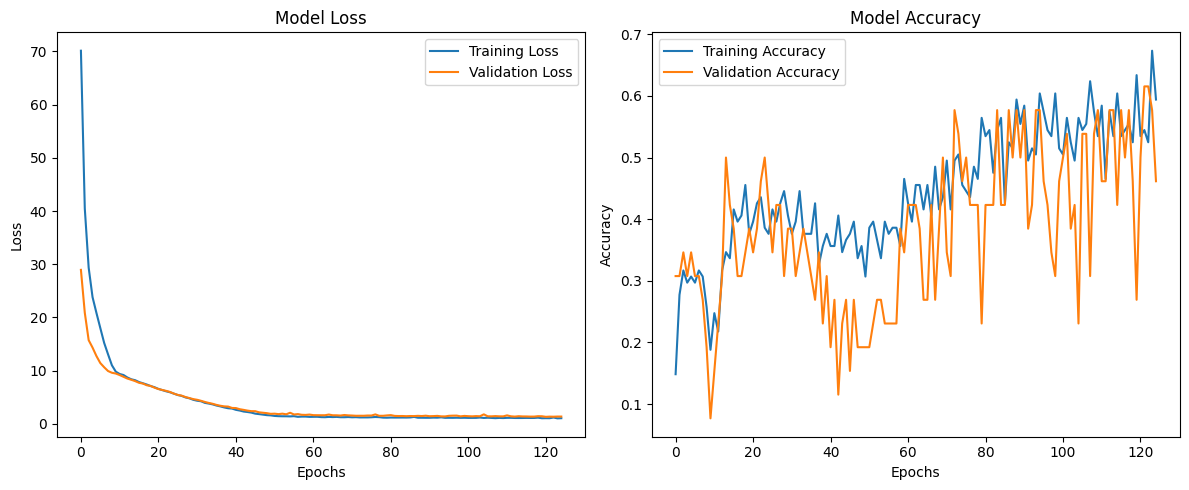

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history1B.history['loss'], label='Training Loss')
plt.plot(history1B.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history1B.history['accuracy'], label='Training Accuracy')
plt.plot(history1B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("The Accuracy Comparison Between Default And The Best Model\n")

print("           Model          |       Test Accuracy       \n")

print("          Default        ",'          {:.5f}'.format(test_accuracyO7))
print("            Best         ",'          {:.5f}'.format(test_accuracy1B))

The Accuracy Comparison Between Default And The Best Model

           Model          |       Test Accuracy       

          Default                   0.43750
            Best                    0.40625


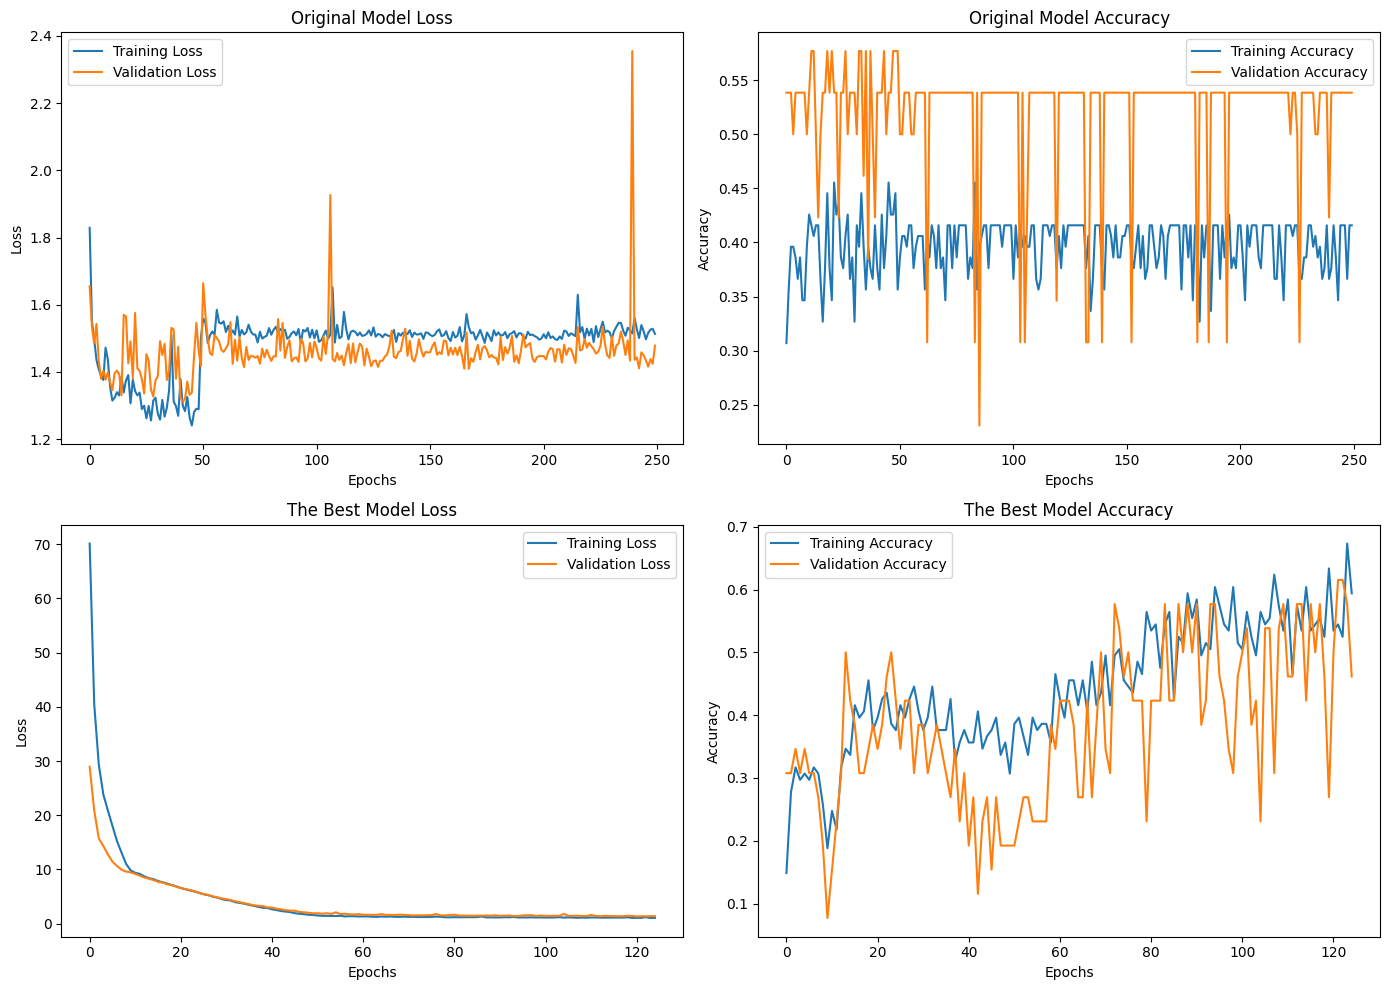

In [ ]:

plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.plot(historyO7.history['loss'], label='Training Loss')
plt.plot(historyO7.history['val_loss'], label='Validation Loss')
plt.title('Original Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(historyO7.history['accuracy'], label='Training Accuracy')
plt.plot(historyO7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Original Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history1B.history['loss'], label='Training Loss')
plt.plot(history1B.history['val_loss'], label='Validation Loss')
plt.title('The Best Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(history1B.history['accuracy'], label='Training Accuracy')
plt.plot(history1B.history['val_accuracy'], label='Validation Accuracy')
plt.title('The Best Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
